# Linear Regression
Linear Regression is a method used to define a relationship between a dependent variable (Y) and independent variable (X).

**Y = mX+c**
# Application of Linear Regression
## Height and Weight data

**Discuss full story behind dataset.**

Context This data set gives average masses for women as a function of their height in
a sample of American women of age 30–39.

Content The data contains the variables
Height (m) Weight (kg)

In [1]:
print("19IT016, Manav_Butani")

19IT016, Manav_Butani


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


1. Read Data from file

Q1. Why you want to apply regression on selected dataset?

As shown below Weight(Y) which is target variable is of continuous type so regression would be the obvious application.

In [3]:
df = pd.read_csv("height-weight.csv")
df.head()

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


Q2. How many total observations in data?

    As shown below there are total 15 obsevations.

Q3. How many independent variables?

    There is just on independent variable, Height.

Q4. Which is dependent variable?

    Weight is dependent variable.


In [4]:
df.shape

(15, 2)

Q5. Which are most useful variable in estimation? Prove using correlation.

    In this dataset there is only one independent variable. So there is no selection of most useful variable. But following is correlation between independent and dependent variable.

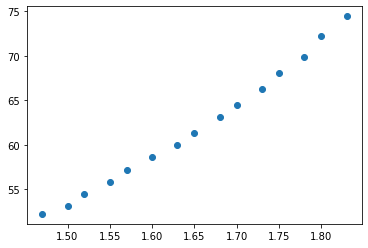

In [6]:
plt.scatter(df.Height, df.Weight)
plt.show()

1.6506666666666665 62.078
61.272186542110624 -39.06195591884392


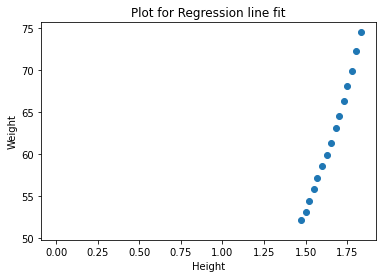

In [13]:
# Model Development using OLS
# Describe OLS method
# Select Data
#X = pd.DataFrame(df.Height)
#Y = df.Weight

Height_bar = df.Height.sum()/df.Height.count()
Weight_bar = df.Weight.sum()/df.Weight.count()
print(Height_bar,Weight_bar)

n = ((df.Height-Height_bar) * (df.Weight-Weight_bar)).sum()
d = ((df.Height-Height_bar)**2).sum()
m = n/d
b = Weight_bar - m* Height_bar
print(m, b)

max_Height = df.Height.max()
height = df.Height
predicted_df = pd.DataFrame(data = range(0,int(max_Height)), columns={'X'})
predicted_df['Y'] = height*m + (b)

x = predicted_df['X']
y = predicted_df['Y']

#fig, ax = plt.subplots(figsize=(12,6))

plt.plot(x,y,c='red')
plt.scatter(df.Height, df.Weight)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Plot for Regression line fit')
#plt.legend()
plt.show()
#n = (X - x_bar)  * (Y - y_bar)


## Implementation of LR using Gradient Descent
Initial Line

Error value/Optimization parameter

Direction of change

Learning rate

Convergence/Number of iterations

We will take m=0 and b=0 as initial values which is just horizontal line.

RMSE

Our challenge is to determine the value of optimum values of m and c, such that the line corresponding to those values is the best fitting line or gives the minimum error.


Error in current values of m and b is called loss function. It means that we need to optimize loss function to reduce error in m and b.

Our loss function will be the Root Mean Squared Error function to calculate the loss and is given by following equation.

Let’s try applying gradient descent to m and c and approach it step by step:

Initially let m = 0 and c = 0. Let L be our learning rate. This controls how much the value of m changes with each step. L could be a small value like 0.0001 for good accuracy.
We will define these all as below.

m = 0

b = 0

learning_rate = 0.01

Calculate the partial derivative of the loss function with respect to m, and plug in the current values of x, y, m and c in it to obtain the derivative value D. As it is in following equation.
<img src = "dm.jpeg" />

This can be written in code as,

D_m = (-2/n) sum(X (Y - Y_pred))

Similarly lets find the partial derivative with respect to c, Dc :
<img src = "dc.jpeg" />

and code for dc is given below,

D_c = (-2/n) * sum(Y - Y_pred)

Now we update the current value of m and c using the following equation: <img src = "mc.jpeg" />
m = m - L * D_m # Update m

c = c - L * D_c # Update c

We repeat this process until our loss function is a very small value or ideally 0 (which means 0 error or 100% accuracy). The value of m and c that we are left with now will be the optimum values.
Practically we will repeat this process for 1000 time which is defined as,

epochs = 1000

In [14]:
Height = df.iloc[:, 0]
Weight = df.iloc[:, 1]

In [15]:
m = 0
c = 0

L      = 0.00001  # The learning Rate
epochs = 2500  # The number of iterations to perform gradient descent

n = float(len(Height)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*Height + c  # The current predicted value of Y
    D_m = (-2/n) * sum(Height * (Weight - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Weight - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
print (m, c)
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
Y_pred = m*Height + c
print("RMSE: ", sqrt(mean_squared_error(Weight,Y_pred)), r2_score(Weight,Y_pred))

4.708373076248757 2.8306970595771928
RMSE:  51.85729389555311 -57.17605371989666


In [19]:
from sklearn import linear_model

# This is using SKlearn API
Height = pd.DataFrame(df.Height)
Weight = df.Weight

# Create object of algorithm

rg = linear_model.LinearRegression()

# Create model by fitting data
rg.fit(Height, Weight)
# RMSE and R2 Score

print("RMSE: ", sqrt(mean_squared_error(Weight,rg.predict(Height))), "R2 Score:", r2_score(Weight,rg.predict(Height)))


RMSE:  0.7066615599131167 R2 Score: 0.9891969224457968


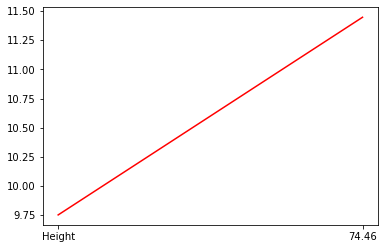

In [22]:
plt.scatter(Height, Weight) 
plt.plot([min(Height), max(Weight)], [min(Y_pred), max(Y_pred)], color='red')  # regression line
plt.show()

In [23]:
#Id No :- 19IT016 Name: Manav_Butani